# Part 2 Q1

In [19]:
def decimal_to_other_base(dec):
    n=(int)(dec)
    binary_base = (bin(n))
    octal_base = (oct(n))
    hexadecimal_base = (hex(n))
    return print("The number in binary base:",binary_base,  
                 "The number in octal base:",octal_base,  "The number in hexadecimal base is:",hexadecimal_base)

### Part 2- working with data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the cast csv

In [21]:
df=pd.read_csv(r'C:\Users\ido14\OneDrive\Desktop\שנה א\מדעי הנתונים\מטלות\Final Projact\cast.csv')
df

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


Answer on question number 2.1

In [23]:
# The number of movies with the title "Hamlet"
hamlet=df[df['title']=="Hamlet"]
hamlet=hamlet.drop_duplicates(keep = 'first').groupby(["year"])
len(hamlet['title'])

17

Answer on question number 2.2

In [28]:
# The treasure island movies sorted
island=df[df.title=="Treasure Island"].sort_values(by='year')
island.drop_duplicates(subset='year', keep="first", inplace=False)

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
1404517,Treasure Island,1920,Bull Montana,actor,Morgan,8.0
926924,Treasure Island,1934,Olin Howland,actor,Pirate of the Spanish Main,13.0
1979467,Treasure Island,1950,Basil Sydney,actor,Captain Smollett,3.0
961365,Treasure Island,1972,V?ctor Israel,actor,Morgan,14.0
1954811,Treasure Island,1973,Larry Storch,actor,Captain Smollett,5.0
1137587,Treasure Island,1985,Martin Landau,actor,The Captain,2.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


Answer on question number 2.3


In [29]:
# Number of roles credited in hamlet in 1921
len(df[(df.title == "Hamlet") & (df.year == 1921)])

9

Answer on question number 2.4

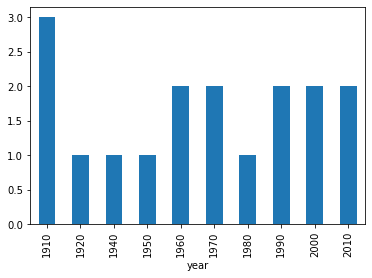

In [33]:
ham=df[(df['title']=="Hamlet")].groupby('year')['year'].unique().sort_values(ascending=True).reset_index(name='made up')
ham.groupby(ham.year//10*10).size().plot(kind='bar')

Answer on question number 2.5

In [8]:
Act=df
Act=Act[Act.year//10==195]
Act=Act[Act.n==1]
Act.groupby(['year','type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

Answer on question number 2.6

In [34]:
actors = df[df['year'].between(1990,2020, inclusive=False)]
actors = actors[actors.n == 1]
((actors.groupby(['year','name']).size().sort_values(ascending=False)).head(10))

year  name            
2007  Dan Castellaneta    21
2012  Stefan Kramer       18
2014  John Cleese         16
2015  Eric Roberts        15
1999  Trey Parker         14
2013  Ed Skudder          13
2002  Phil Vischer        13
2010  Kyle Rea            13
2004  Trey Parker         13
      Phil Cornwell       13
dtype: int64

Answer on question number 2.7

In [53]:
frank=df[df.name=='Frank Oz']
frankg=frank.groupby(['year','title']).size()
frankdf = frankg.to_frame().reset_index()
frankdf=frankdf.rename(columns={ 0: "nRoles"})
frankdf.loc[frankdf['nRoles']>1]

,year,title,nRoles
0,1979,The Muppet Movie,8
3,1981,An American Werewolf in London,2
4,1981,The Great Muppet Caper,6
5,1982,The Dark Crystal,2
9,1984,The Muppets Take Manhattan,7
10,1985,Sesame Street Presents: Follow that Bird,3
14,1992,The Muppet Christmas Carol,7
15,1996,Muppet Treasure Island,4
17,1999,Muppets from Space,4
19,1999,The Adventures of Elmo in Grouchland,3
